In [2]:
%matplotlib widget
from Mapping import Mapping_ID02


## Single file mapping

In [3]:
path='./JNC21_WAXSdata/'
file=path+'CobaltNanoRod_waxs_00018_raw.h5'
cif='./JNC21_WAXSdata/Co_P63mmc.cif'
reflections=[[1,0,0],[0,0,2],[1,0,1]]
# create instance of Mapping_ID02 class for a single file
map=Mapping_ID02(file,cif,reflections,binning=3,threshold=0.0001)


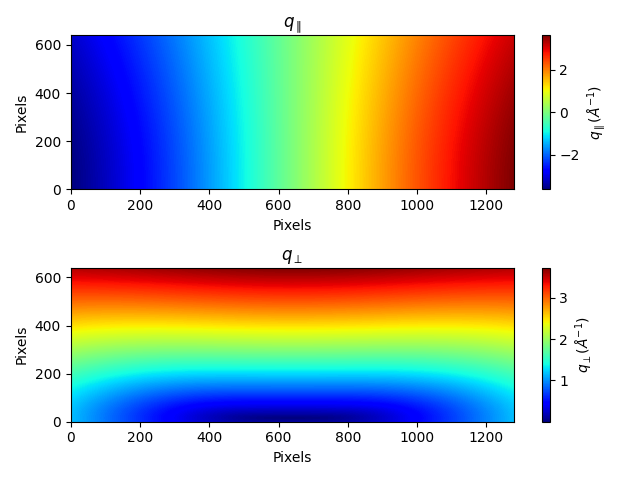

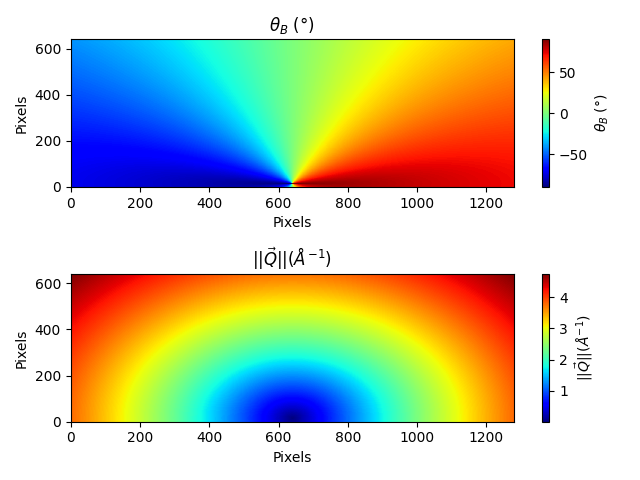

In [4]:
# Map q components
map.plotcomponents()


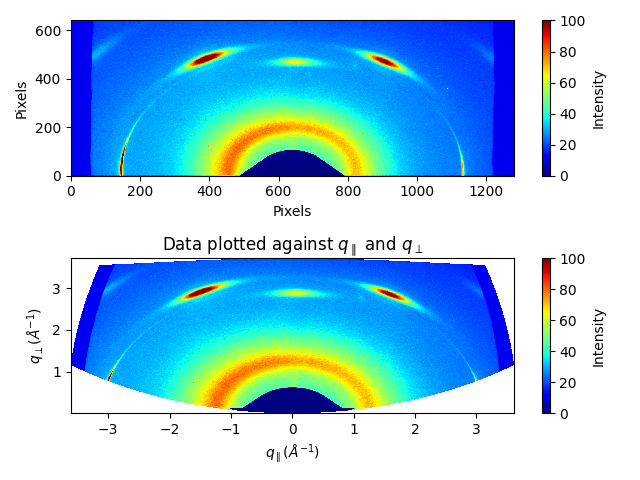

In [5]:
# create reciprocal space map from detector image
map.plot2D()

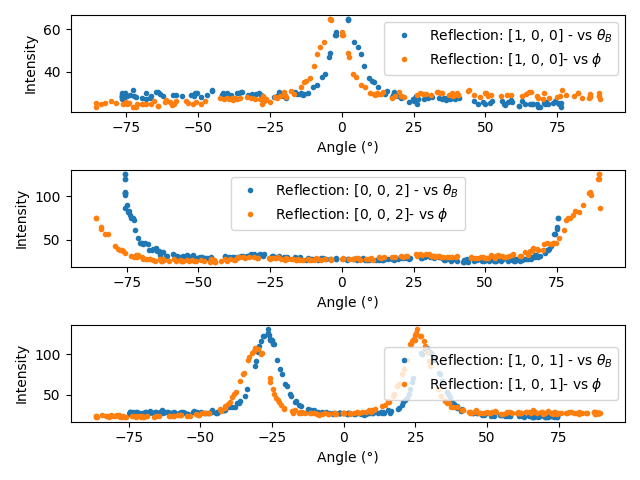

In [6]:
# extract azimuthal profiles for given reflections. Compare with plots against phi
map.plot_azim_profiles(plotphi=True)

plot saved: ./JNC21_WAXSdata/azim_profile_fittings//CobaltNanoRod_waxs_00018_raw-Reflection=[1, 0, 0]-B=10mT_fit.png
plot saved: ./JNC21_WAXSdata/azim_profile_fittings//CobaltNanoRod_waxs_00018_raw-Reflection=[0, 0, 2]-B=10mT_fit.png
plot saved: ./JNC21_WAXSdata/azim_profile_fittings//CobaltNanoRod_waxs_00018_raw-Reflection=[1, 0, 1]-B=10mT_fit.png


{'[1, 0, 0]': [28.64643905988518,
  444.4028934912767,
  1.2602351478872977,
  5.351607259605417,
  444.4028934912767,
  0.9913944083491409],
 '[0, 0, 2]': [20.416141557874642,
  368.70067389850675,
  -75.51740753470631,
  2.261769636746895,
  368.70067389850703,
  0.9682361164817063],
 '[1, 0, 1]': [27.96712929170533,
  1118.6987891862561,
  -26.81289888469982,
  4.772948638119235,
  1118.6987891862568,
  0.9945167991656978]}

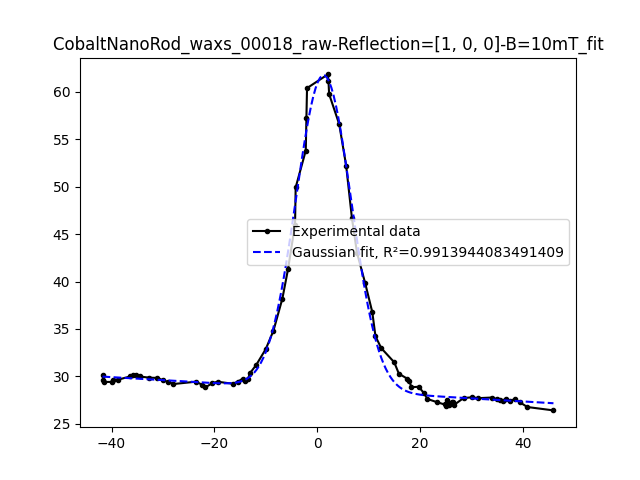

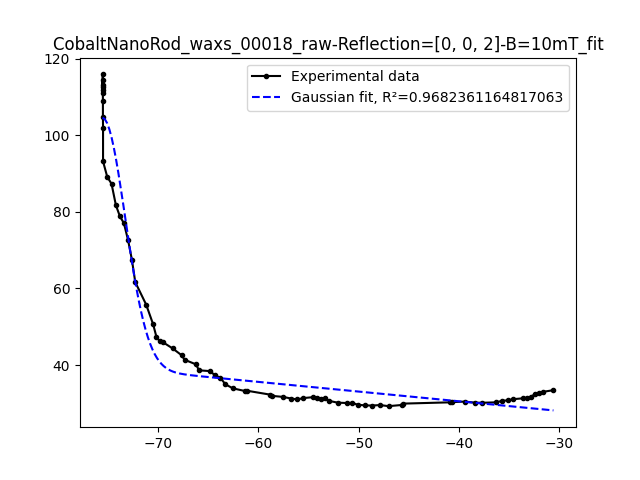

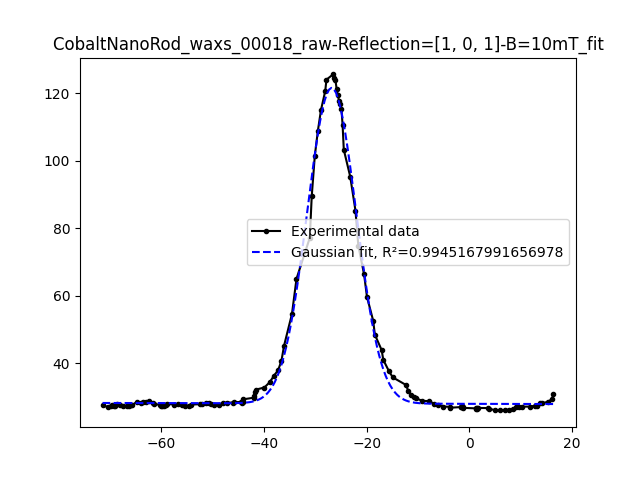

In [7]:
# Perform a gaussian fit of azimuthal profiles, and export to csv file
map.azim_profile_fit(plotflag=True)

## Batch analysis

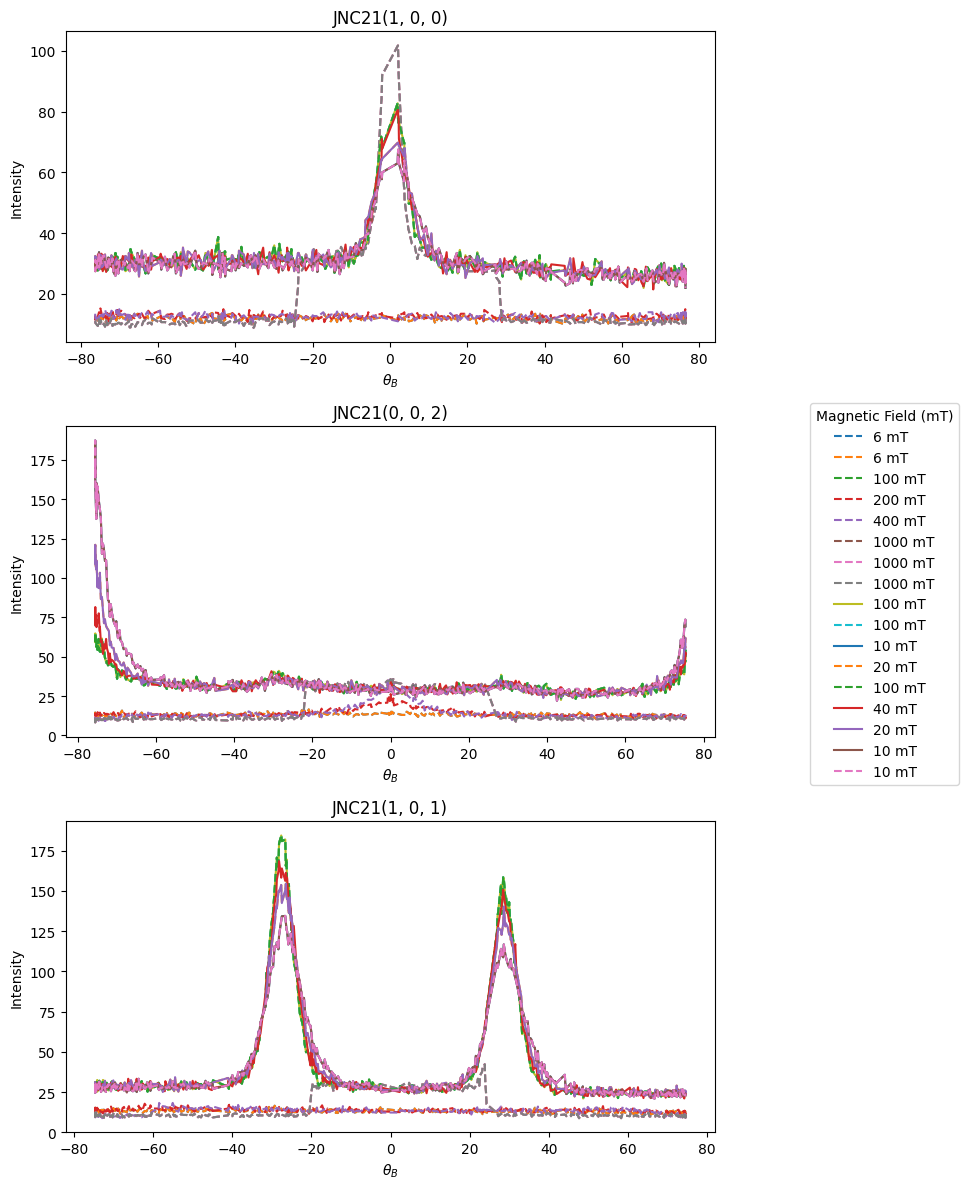

/home-local/ratel-ra/Documents/SAXS_data/SAXS_ESRF/HC-5495/code_profil_azimuthal_waxs/docs_marianne/Mapping.py:823: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset= subset0[self.df['R_squared'] > r2_threshold]
/home-local/ratel-ra/Documents/SAXS_data/SAXS_ESRF/HC-5495/code_profil_azimuthal_waxs/docs_marianne/Mapping.py:823: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset= subset0[self.df['R_squared'] > r2_threshold]
/home-local/ratel-ra/Documents/SAXS_data/SAXS_ESRF/HC-5495/code_profil_azimuthal_waxs/docs_marianne/Mapping.py:823: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset= subset0[self.df['R_squared'] > r2_threshold]


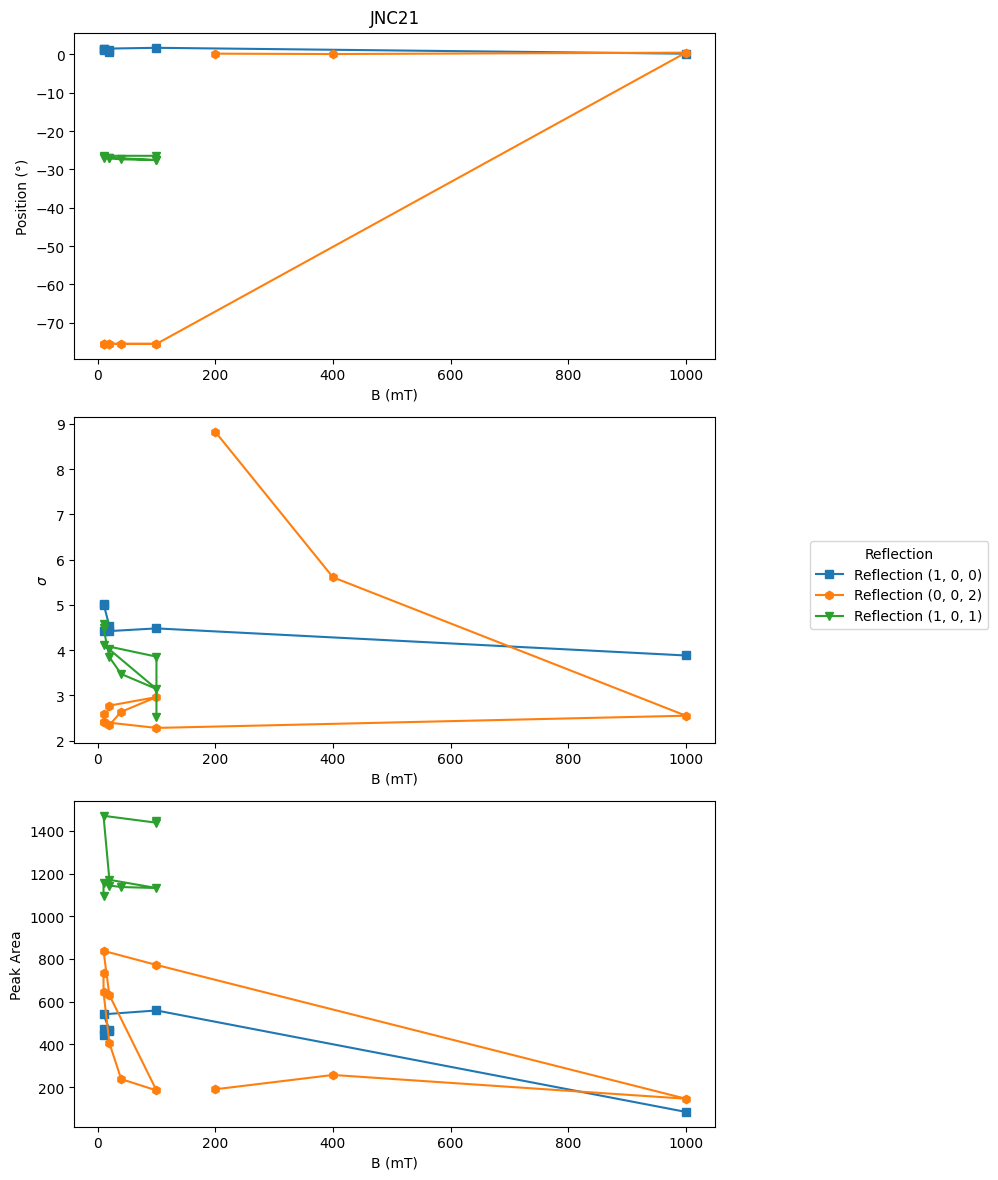

In [1]:
from Mapping import BatchAzimProfileExtraction_ID02

path='./JNC21_WAXSdata'
# Set wildcards for file filter
file_filter='*_waxs*_raw.h5'

# define which azimutal profiles to extract
cif='/home-local/ratel-ra/Documents/CIF_database/Co_P63mmc.cif'
reflections=[[1,0,0],[0,0,2],[1,0,1]]

batch=BatchAzimProfileExtraction_ID02(path,cif,reflections,file_filter,plotflag=False)
# Plot azimuthal profil evolution as a function of B
batch.plot_save_azim_profiles_vs_B()

# Perform refinement of each azimuthal profiles and plot evolution of refined parameters (peak position, standard deviation, peak area) as a function of B
df=batch.fit_azimprofiles(plot=True,r2_threshold=0.92)